AI-12기 장지연 Section 1 project

1지역에 따라서 선호하는 게임 장르가 다를까

2연도별 게임의 트렌드가 있을까

3출고량이 높은 게임에 대한 분석 및 시각화 프로세스

1. 데이터 다듬기 작업

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from google.colab import files
uploaded= files.upload()
df = pd.read_csv("vgames2.csv", index_col = 0)

Saving vgames2.csv to vgames2 (1).csv


In [14]:
df.replace('0K' ,'0', inplace = True) # 0k는 '0'이니까 이것부터 제거 합니다

# M단위를 K단위로 편의상 바꿔줍니다.
def to_int(x) :
  if 'K' in x :
    return int(x.replace('K', ''))
  else :
    return int(float(x.replace('M', '')) * 1000)

df['NA_Sales'] = df['NA_Sales'].apply(to_int)
df['EU_Sales'] = df['EU_Sales'].apply(to_int)
df['JP_Sales'] = df['JP_Sales'].apply(to_int)
df['Other_Sales'] = df['Other_Sales'].apply(to_int)

df.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170,0,0,10
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,20,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120,90,0,40
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,140,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,20,10,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,70,0,110,10
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,40,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,40,30,0,10


In [51]:
# 필요한 부분만 가져온 후 Groupby를 이용해 장르별로 추산합니다
df1 = df.loc[:, ["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
df1 = df1.groupby(["Genre"], as_index=False).sum()

df1.head(20)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,874808,522158,157900,186449
1,Adventure,105660,64050,51950,16810
2,Fighting,223198,101220,87340,36640
3,Misc,408050,212360,105270,74040
4,Platform,446440,201610,130650,51530
5,Puzzle,123350,50730,56870,12520
6,Racing,357188,237100,56400,77100
7,Role-Playing,319540,183580,344950,56960
8,Shooter,581919,313049,38280,102650
9,Simulation,182958,113350,63700,31480


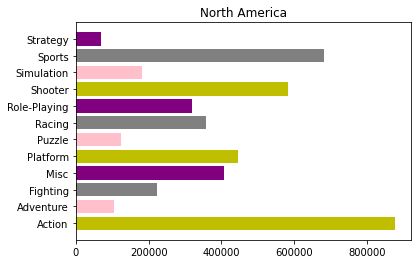

In [86]:
plt.title("North America")
x_data = df1.loc[:, "Genre"]
y_data = df1.loc[:, "NA_Sales"]
plt.barh(x_data, y_data, color = ['y', 'pink', 'grey', 'purple']) #bar(막대를 표시할 위치, 막대의 높이)
plt.show()

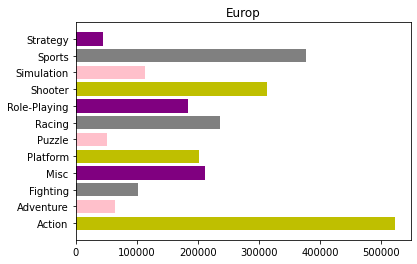

In [85]:
plt.title("Europ")
x_data = df1.loc[:, "Genre"]
y_data = df1.loc[:, "EU_Sales"]
plt.barh(x_data, y_data, color = ['y', 'pink', 'grey', 'purple']) #bar(막대를 표시할 위치, 막대의 높이)
plt.show()

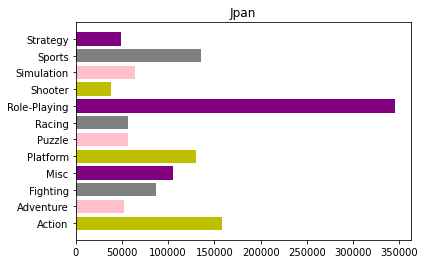

In [84]:
plt.title("Jpan")
x_data = df1.loc[:, "Genre"]
y_data = df1.loc[:, "JP_Sales"]
plt.barh(x_data, y_data, color = ['y', 'pink', 'grey', 'purple']) #bar(막대를 표시할 위치, 막대의 높이)
plt.show()

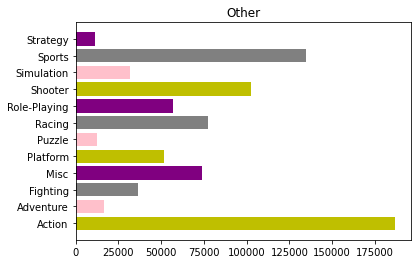

In [83]:
plt.title("Other")
x_data = df1.loc[:, "Genre"]
y_data = df1.loc[:, "Other_Sales"]
plt.barh(x_data, y_data, color = ['y', 'pink', 'grey', 'purple']) #bar(막대를 표시할 위치, 막대의 높이)
plt.show()

In [184]:
# 장르별
df2 = df.loc[:, [ "Year", "Platform", "Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
df2["Sales"] = df2["NA_Sales"] + df2["EU_Sales"] + df2["JP_Sales"] + df2["Other_Sales"]
df2 = df2.drop(["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], axis = 'columns')
df2 = df2.dropna()

def to_year(x) :
  x = int(x)
  if x <= 50 :
    x = x + 2000
  elif x <= 100 :
    x = x + 1900
  return x

df2["Year"] = df2["Year"].apply(to_year)

In [154]:
# 장르와 시간별로 그룹화하고 장르별로 다 나눠줬다 
df2_G = df2.groupby(["Genre", "Year"], as_index=False).sum()

Genre_Action        = df2_G[df2_G["Genre"] == 'Action']
Genre_Adventure     = df2_G[df2_G["Genre"] == 'Adventure']
Genre_Fighting      = df2_G[df2_G["Genre"] == 'Fighting']
Genre_Misc          = df2_G[df2_G["Genre"] == 'Misc']
Genre_Platform      = df2_G[df2_G["Genre"] == 'Platform']
Genre_Puzzle        = df2_G[df2_G["Genre"] == 'Puzzle']
Genre_Racing        = df2_G[df2_G["Genre"] == 'Racing']
Genre_Shooter       = df2_G[df2_G["Genre"] == 'Shooter']
Genre_Simulation    = df2_G[df2_G["Genre"] == 'Simulation']
Genre_Sports        = df2_G[df2_G["Genre"] == 'Sports']
Genre_Strategy      = df2_G[df2_G["Genre"] == 'Strategy']
Genre_Role_Playing  = df2_G[df2_G["Genre"] == "Role-Playing"]

In [174]:
print(Genre_Action["Sales"].std(axis= 0))
print(Genre_Adventure["Sales"].std(axis= 0))
print(Genre_Fighting["Sales"].std(axis= 0))
print(Genre_Misc["Sales"].std(axis= 0))
print(Genre_Platform["Sales"].std(axis= 0))
print(Genre_Puzzle["Sales"].std(axis= 0))
print(Genre_Racing["Sales"].std(axis= 0))
print(Genre_Shooter["Sales"].std(axis= 0))
print(Genre_Simulation["Sales"].std(axis= 0))
print(Genre_Sports["Sales"].std(axis= 0))
print(Genre_Strategy["Sales"].std(axis= 0))
print(Genre_Role_Playing["Sales"].std(axis= 0))

47286.69650882412
6834.498274684592
9280.742229081685
29448.946385665593
14286.861594008293
8081.035330177424
19844.20731426306
29051.220766197577
14408.624445326195
38111.00586006453
4682.963098788564
20830.52087682879


장르별 표준편차로 알 수 있는 점은, 
액션과 스포츠 장르는 트렌드를 많이 탄다는 것이다. 

퍼즐과 어드벤쳐같은 장르는 표준편차가 적은 것으로 보아 
변함없는 인기를 유지하고 있다.
(인기가 계속 그냥 없는 것 같지만..)

확연히 표준편차가 큰 액션, 스포츠, 슈터와 Misc를 살펴보겠다.

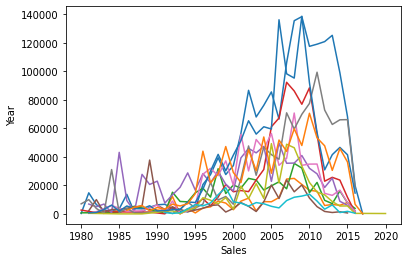

In [173]:
#그냥 한번 다 넣어봤다.
plt.plot(Genre_Action["Year"], Genre_Action["Sales"])
plt.plot(Genre_Adventure["Year"], Genre_Adventure["Sales"])
plt.plot(Genre_Fighting["Year"], Genre_Fighting["Sales"])
plt.plot(Genre_Misc["Year"], Genre_Misc["Sales"])
plt.plot(Genre_Platform["Year"], Genre_Platform["Sales"])
plt.plot(Genre_Puzzle["Year"], Genre_Puzzle["Sales"])
plt.plot(Genre_Racing["Year"], Genre_Racing["Sales"])
plt.plot(Genre_Shooter["Year"], Genre_Shooter["Sales"])
plt.plot(Genre_Simulation["Year"], Genre_Simulation["Sales"])
plt.plot(Genre_Strategy["Year"], Genre_Strategy["Sales"])
plt.plot(Genre_Sports["Year"], Genre_Sports["Sales"])
plt.plot(Genre_Role_Playing["Year"], Genre_Role_Playing["Sales"])

plt.xlabel('Sales')
plt.ylabel('Year')
plt.show()

전체 그래프를 보면 확실히 1995년도부터 게임시장이 활발해지는 것을 볼 수 있다. 2005년대부터 가속화가 보이는데, 제일 최근 자료는 없는지 2015년부터 끊긴다.. 데이터를 수정해야겠지만 시간이 없으니 넘어간다!^0^

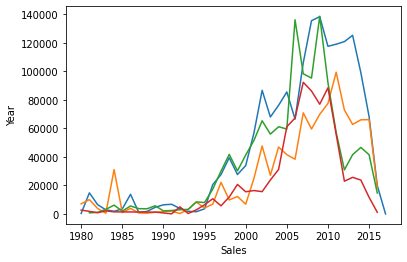

In [177]:
plt.plot(Genre_Action["Year"], Genre_Action["Sales"])
plt.plot(Genre_Shooter["Year"], Genre_Shooter["Sales"])
plt.plot(Genre_Sports["Year"], Genre_Sports["Sales"])
plt.plot(Genre_Misc["Year"], Genre_Misc["Sales"])

plt.xlabel('Sales')
plt.ylabel('Year')
plt.show()

위의 네가지 장르가 예전보다 인기가 확연히 오른 장르라고 할 수 있다.
그런데 2010년도부터 급격히 하락하는 건 데이터의 부족으로 보인다..?
최신자료까지 있는 데이터를 활용해보면 확실히 알 수 있을 것 같다.
이정도도 버겁다 수고했다 ㅠ

다음은 플랫폼의 트렌드 변화를 알아보겠다. 그런데 굳이 시장점유율이 낮은 친구들까지 알 필요는 없으므로 판매량을 내림차순으로 정렬해서 본 다음에 높은 아이들만 골라서 그래프로 그려보겠다!

In [193]:
df2_P = df2.groupby(["Platform"], as_index=False).sum()

In [196]:
df2_P.sort_values('Sales', ascending = False)

,Platform,Year,Sales
16,PS2,4251711,1222437
28,X360,2476178,968599
17,PS3,2612057,946738
26,Wii,2579512,900149
4,DS,4275461,817240
15,PS,2367631,725157
6,GBA,1620601,312650
19,PSP,2396411,290840
18,PS4,675027,275780
5,GB,193608,254430


역시 6위 아래부터는 점유율 차이가 상당히 많이 난다. (애초에 나도 플스 다음은 잘 모르겠다.) 그럼 1~6위까지만 확인해보자!
어근데 추억의 3DS까진 해보고싶다. 하지만 너무 많다. 난 말하는 감자란말이에요!@0@

In [198]:
df2_P = df2.groupby(["Year", "Platform"], as_index=False).sum()

P_PS2   = df2_P[df2_P["Platform"] == 'PS2']
P_X360  = df2_P[df2_P["Platform"] == 'X360']
P_PS3   = df2_P[df2_P["Platform"] == 'PS3']
P_Wii   = df2_P[df2_P["Platform"] == 'Wii']
P_DS    = df2_P[df2_P["Platform"] == 'DS']
P_PS    = df2_P[df2_P["Platform"] == 'PS']

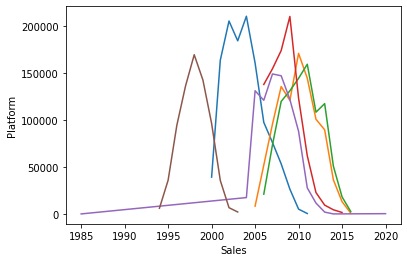

In [200]:
plt.plot(P_PS2["Year"], P_PS2["Sales"])
plt.plot(P_X360["Year"], P_X360["Sales"])
plt.plot(P_PS3["Year"], P_PS3["Sales"])
plt.plot(P_Wii["Year"], P_Wii["Sales"])
plt.plot(P_DS["Year"], P_DS["Sales"])
plt.plot(P_PS["Year"], P_PS["Sales"])

plt.xlabel('Sales')
plt.ylabel('Platform')
plt.show()

호호.. 대부분이 한때군요.. 플랫폼은 변하기 마련이니까.. 역시 PC를 넣었어야했나. 혹쉬모르니까 PC를 넣어봅시다.

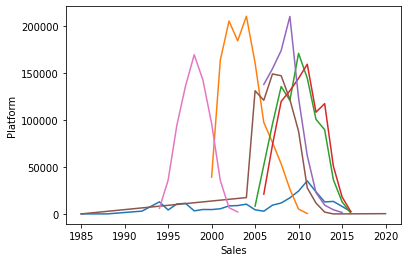

In [201]:
P_PC   = df2_P[df2_P["Platform"] == 'PC']

plt.plot(P_PC["Year"], P_PC["Sales"])
plt.plot(P_PS2["Year"], P_PS2["Sales"])
plt.plot(P_X360["Year"], P_X360["Sales"])
plt.plot(P_PS3["Year"], P_PS3["Sales"])
plt.plot(P_Wii["Year"], P_Wii["Sales"])
plt.plot(P_DS["Year"], P_DS["Sales"])
plt.plot(P_PS["Year"], P_PS["Sales"])

plt.xlabel('Sales')
plt.ylabel('Platform')
plt.show()

PC겜만 하는 사람으로서 저 데이터를 납득할 수는 없지만 2010년까진 그럴듯한 데이터라고 친다면 정말 놀라운 데이터군요
사실 분석을 잘못한 것 같긴 하지만 하핫 뭐 암튼요
다른 분들의 프로젝트 영상을 보고 배울 생각만 하고있습니다 하하하ㅏ하
주말동안 일이 생겨서.. 사실 금요일 월요일도 거의 못했거든요 하ㅏ하
죄송합니다...
맨날 다음에 열심히 한다는 생각만하고 열심히 해본적도 없고
너무 자책감드네요ㅜ

에이 그 많은 기수분들의 코랩을 다 열어보시겠어! 코치님이! 라는 생각으로 이런 이상한 코멘트를 적고있는데(사실 너무 졸려서 제정신이 아니라서) 보시면 어쩌지라는 생각이 요로코롬 작게 들지만 하하하 모르겠습니다. 그럼 마지막 문제를 향해서 가봅시다. 1, 2번 결론도 안내놨지만 하하하하